### https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#18dominanttopicineachsentence


In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [4]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
# lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
df = pd.read_pickle("data/clean_data/CA_full_data_filtered.pkl")
data = df.TXT.values.tolist()
data

['Temperature error-correction method for surface air temperature data climate change; computational fluid dynamics; correction method; neural network algorithm; temperature data; temperature error In climate change research, accurate temperature data are often demanded. However, affected by many factors, especially solar radiation, the accuracy of environmental air temperature measurement can be greatly reduced, since there is a difference in temperature between the environmental air and the related temperature measured by the sensor accommodated inside the radiation shield. In the paper, the term "temperature error" refers to the temperature difference described above. To improve the accuracy of the temperature data, a temperature error-correction method is proposed. First, a computational fluid dynamics (CFD) method is adopted to quantify the temperature errors accurately. A neural network algorithm is then applied to form a universal correction equation by fitting temperature error

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['temperature', 'error', 'correction', 'method', 'for', 'surface', 'air', 'temperature', 'data', 'climate', 'change', 'computational', 'fluid', 'dynamics', 'correction', 'method', 'neural', 'network', 'algorithm', 'temperature', 'data', 'temperature', 'error', 'in', 'climate', 'change', 'research', 'accurate', 'temperature', 'data', 'are', 'often', 'demanded', 'however', 'affected', 'by', 'many', 'factors', 'especially', 'solar', 'radiation', 'the', 'accuracy', 'of', 'environmental', 'air', 'temperature', 'measurement', 'can', 'be', 'greatly', 'reduced', 'since', 'there', 'is', 'difference', 'in', 'temperature', 'between', 'the', 'environmental', 'air', 'and', 'the', 'related', 'temperature', 'measured', 'by', 'the', 'sensor', 'accommodated', 'inside', 'the', 'radiation', 'shield', 'in', 'the', 'paper', 'the', 'term', 'temperature', 'error', 'refers', 'to', 'the', 'temperature', 'difference', 'described', 'above', 'to', 'improve', 'the', 'accuracy', 'of', 'the', 'temperature', 'data',

In [156]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['temperature', 'error_correction', 'method', 'for', 'surface', 'air_temperature', 'data', 'climate_change', 'computational_fluid_dynamics', 'correction_method', 'neural_network_algorithm', 'temperature', 'data', 'temperature', 'error', 'in', 'climate_change', 'research', 'accurate', 'temperature', 'data', 'are_often', 'demanded', 'however', 'affected_by', 'many', 'factors', 'especially', 'solar_radiation', 'the', 'accuracy', 'of', 'environmental', 'air_temperature', 'measurement', 'can_be', 'greatly', 'reduced', 'since', 'there_is', 'difference', 'in', 'temperature', 'between', 'the', 'environmental', 'air', 'and', 'the', 'related', 'temperature', 'measured', 'by', 'the', 'sensor', 'accommodated', 'inside', 'the', 'radiation', 'shield', 'in', 'the', 'paper', 'the', 'term', 'temperature', 'error', 'refers_to_the', 'temperature', 'difference', 'described', 'above', 'to_improve', 'the', 'accuracy', 'of', 'the', 'temperature', 'data', 'temperature', 'error_correction', 'method', 'is', 'pr

In [157]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [190]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [191]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_trigrams = make_trigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['temperature', 'method', 'surface', 'datum', 'computational_fluid_dynamic', 'temperature', 'datum', 'temperature', 'error', 'research', 'accurate', 'temperature', 'datum', 'often', 'demand', 'however', 'affect', 'many', 'factor', 'especially', 'accuracy', 'environmental', 'measurement', 'greatly', 'reduce', 'difference', 'temperature', 'environmental', 'air', 'relate', 'temperature', 'measure', 'sensor', 'accommodate', 'radiation', 'shield', 'paper', 'term', 'temperature', 'error', 'refer', 'temperature', 'difference', 'describe', 'improve', 'accuracy', 'temperature', 'datum', 'temperature', 'error_correction', 'method', 'propose', 'first', 'computational_fluid_dynamic', 'adopt', 'quantify', 'temperature', 'error', 'accurately', 'neural_network_algorithm', 'applied', 'form', 'fitting', 'temperature', 'error', 'calculate', 'use', 'finally', 'validate', 'correction_equation', 'field', 'observation', 'experiment', 'perform', 'root_mean_square_error', 'temperature', 'error', 'obtain', 'e

In [174]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 6), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 8), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 2), (42, 1), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 2), (53, 2), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 3), (61, 1), (62, 17), (63, 1), (64, 3), (65, 1)]]


In [175]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]



[[('accommodate', 1),
  ('accuracy', 3),
  ('accurate', 1),
  ('accurately', 2),
  ('add', 1),
  ('adopt', 1),
  ('affect', 1),
  ('air', 1),
  ('applied', 1),
  ('calculate', 1),
  ('computational_fluid_dynamic', 2),
  ('continuously', 1),
  ('correction_equation', 1),
  ('correspond', 2),
  ('datum', 6),
  ('degree', 1),
  ('degrees_respectively', 1),
  ('demand', 1),
  ('describe', 1),
  ('determine', 1),
  ('difference', 2),
  ('dtr', 1),
  ('environmental', 2),
  ('environmental_factor', 1),
  ('error', 8),
  ('error_correction', 1),
  ('especially', 1),
  ('experiment', 1),
  ('experimentally', 1),
  ('factor', 1),
  ('factors_influence', 1),
  ('field', 1),
  ('finally', 1),
  ('first', 1),
  ('fitting', 1),
  ('form', 1),
  ('furtherly', 1),
  ('greatly', 1),
  ('however', 1),
  ('improve', 2),
  ('many', 1),
  ('may', 2),
  ('measure', 1),
  ('measurement', 1),
  ('method', 3),
  ('neural_network_algorithm', 1),
  ('observation', 1),
  ('obtain', 1),
  ('often', 1),
  ('paper'

In [184]:
from collections import Counter

frequencies = Counter()
frequencies_ngram = Counter()
stuff = [[(id2word[id], freq) for id, freq in cp] for cp in corpus]
for i, tok in enumerate(stuff):
    for tup in tok:
        if "_" in tup[0]:
            frequencies_ngram[tup[0]] += 1
        frequencies[tup[0]] +=1


print(frequencies.most_common(10))
print(frequencies["neural_network"])

[('use', 3235), ('model', 2642), ('base', 2241), ('datum', 1989), ('study', 1981), ('method', 1675), ('result', 1649), ('system', 1291), ('approach', 1266), ('analysis', 1217)]
87


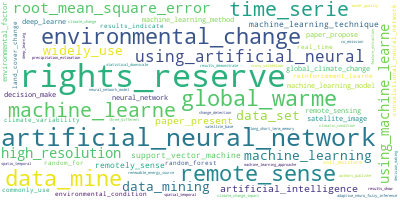

In [185]:
# Nuage de mots
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies_ngram)
wordcloud.to_image()
# wordcloud.to_file("img/worldcloud.png")
wordcloud.to_image()

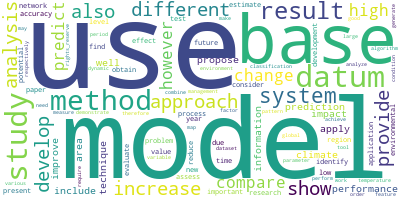

In [186]:
# Nuage de mots
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies)
wordcloud.to_image()
# wordcloud.to_file("img/worldcloud.png")
wordcloud.to_image()

In [133]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [134]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.058*"precipitation" + 0.046*"rainfall" + 0.034*"drought" + '
  '0.019*"product" + 0.016*"scale" + 0.016*"monthly" + 0.015*"station" + '
  '0.015*"streamflow" + 0.014*"extreme" + 0.012*"datum"'),
 (1,
  '0.024*"learn" + 0.022*"learning" + 0.018*"datum" + 0.017*"base" + '
  '0.017*"environmental" + 0.013*"method" + 0.013*"system" + 0.012*"use" + '
  '0.012*"change" + 0.012*"performance"'),
 (2,
  '0.047*"model" + 0.024*"use" + 0.019*"neural" + 0.018*"climate" + '
  '0.016*"network" + 0.014*"result" + 0.014*"study" + 0.014*"change" + '
  '0.012*"datum" + 0.011*"water"'),
 (3,
  '0.030*"classification" + 0.024*"area" + 0.024*"image" + 0.018*"change" + '
  '0.017*"spatial" + 0.017*"high" + 0.016*"use" + 0.015*"map" + 0.014*"land" + '
  '0.013*"forest"'),
 (4,
  '0.021*"specie" + 0.021*"growth" + 0.019*"sugarcane" + 0.017*"environmental" '
  '+ 0.016*"plant" + 0.016*"change" + 0.015*"distribution" + '
  '0.013*"population" + 0.010*"community" + 0.009*"ecological"'),
 (5,
  '0.032*"

In [135]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.580048371744131

Coherence Score:  0.43169330299154957


In [136]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.152577 -0.102372       1        1  36.672987
1      0.172707 -0.034954       2        1  19.749437
3      0.090138 -0.114030       3        1  13.469112
5      0.103567  0.135394       4        1  12.705452
4      0.010997  0.202854       5        1   5.967129
7     -0.016595  0.173580       6        1   5.134977
0     -0.108261 -0.292935       7        1   4.499131
6     -0.405131  0.032462       8        1   1.801777, topic_info=            Term          Freq         Total Category  logprob  loglift
242        model  10348.000000  10348.000000  Default  30.0000  30.0000
10        change   7598.000000   7598.000000  Default  29.0000  29.0000
11       climate   5048.000000   5048.000000  Default  28.0000  28.0000
1437    emission   1451.000000   1451.000000  Default  27.0000  27.0000
206       system   3872.000000   3872.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
280      capture     68.525653    256.680827   Topic8  -5.0448   2.6958
1597     storage     54.417897    307.267317   Topic8  -5.2753   2.2854
1715      engine     40.385911     92.661103   Topic8  -5.5735   3.1859
997   contribute     43.451914    497.099070   Topic8  -5.5004   1.5793
229     estimate     41.874336   1703.836134   Topic8  -5.5374   0.3104

[473 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1450      1  0.091390      able
1450      2  0.900521      able
1450      4  0.006687      able
5730      3  0.996811    abrupt
1760      7  0.987400  absolute
...     ...       ...       ...
4881      2  0.995922  workload
349       1  0.852521      year
349       3  0.128050      year
349       5  0.019766      year
350       1  0.999329     yield

[797 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 6, 5, 8, 1, 7])

In [137]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [138]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

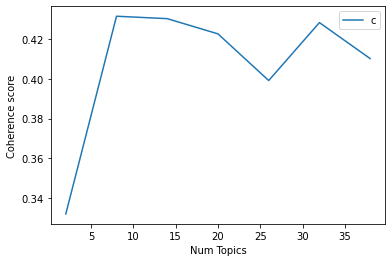

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/ke

In [139]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3319
Num Topics = 8  has Coherence Value of 0.4317
Num Topics = 14  has Coherence Value of 0.4305
Num Topics = 20  has Coherence Value of 0.4228
Num Topics = 26  has Coherence Value of 0.3992
Num Topics = 32  has Coherence Value of 0.4285
Num Topics = 38  has Coherence Value of 0.4103


In [130]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=5, 
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)
coherencemodel = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_value = coherencemodel.get_coherence()
coherence_value

0.41728290323491823

In [195]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.058*"precipitation" + 0.046*"rainfall" + 0.034*"drought" + '
  '0.019*"product" + 0.016*"scale" + 0.016*"monthly" + 0.015*"station" + '
  '0.015*"streamflow" + 0.014*"extreme" + 0.012*"datum"'),
 (1,
  '0.024*"learn" + 0.022*"learning" + 0.018*"datum" + 0.017*"base" + '
  '0.017*"environmental" + 0.013*"method" + 0.013*"system" + 0.012*"use" + '
  '0.012*"change" + 0.012*"performance"'),
 (2,
  '0.047*"model" + 0.024*"use" + 0.019*"neural" + 0.018*"climate" + '
  '0.016*"network" + 0.014*"result" + 0.014*"study" + 0.014*"change" + '
  '0.012*"datum" + 0.011*"water"'),
 (3,
  '0.030*"classification" + 0.024*"area" + 0.024*"image" + 0.018*"change" + '
  '0.017*"spatial" + 0.017*"high" + 0.016*"use" + 0.015*"map" + 0.014*"land" + '
  '0.013*"forest"'),
 (4,
  '0.021*"specie" + 0.021*"growth" + 0.019*"sugarcane" + 0.017*"environmental" '
  '+ 0.016*"plant" + 0.016*"change" + 0.015*"distribution" + '
  '0.013*"population" + 0.010*"community" + 0.009*"ecological"'),
 (5,
  '0.032*"

In [196]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = list(row)[0]
        row = sorted(row, key=lambda x: x[1], reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

opt_mod = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=8, 
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)
df_topic_sents_keywords = format_topics_sentences(ldamodel=opt_mod, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(100)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7597,"model, use, datum, base, method, performance, ...",Temperature error-correction method for surfac...
1,1,2.0,0.5731,"model, use, datum, base, method, performance, ...",Ensemble Machine Learning Approach Improves Pr...
2,2,4.0,0.3715,"system, management, energy, resource, cost, re...",OPEN SCIENCE AND ARTIFICIAL INTELLIGENCE SUPPO...
3,3,2.0,0.4030,"model, use, datum, base, method, performance, ...",Contiguous US surface water availability and s...
4,4,2.0,0.3547,"model, use, datum, base, method, performance, ...",No perfect storm for crop yield failure in Ger...
...,...,...,...,...,...
95,95,2.0,0.3578,"model, use, datum, base, method, performance, ...",The adaptive thermal comfort review from the 1...
96,96,2.0,0.4754,"model, use, datum, base, method, performance, ...",Application of Machine Learning to support pro...
97,97,1.0,0.3990,"area, soil, change, map, land, forest, estimat...",A Novel and Efficient Spatiotemporal Oxygen Pr...
98,98,2.0,0.3924,"model, use, datum, base, method, performance, ...",Fishery migration under the influence of globa...


In [197]:
# Group top 5 sentences under each topic
sent_topics_sorted = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorted = pd.concat([sent_topics_sorted, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorted.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorted.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

sent_topics_sorted = sent_topics_sorted.set_index("Topic_Num")
# Show
sent_topics_sorted.head(8)


,Topic_Perc_Contrib,Keywords,Text
Topic_Num,,,
0.0,0.6024,"system, sensor, sensing, datum, software, prop...",From Relative Azimuth to Absolute Location: Pu...
1.0,0.7424,"area, soil, change, map, land, forest, estimat...",Seasonal Carbon Dynamics in the Near-Global Oc...
2.0,0.8646,"model, use, datum, base, method, performance, ...",Research on Urban Water Demand Prediction Urba...
3.0,0.2817,"drone, avoid, ozone, exploratory, pm, island, ...",Heat stress upregulation of Toll-like receptor...
4.0,0.7771,"system, management, energy, resource, cost, re...",SUSTAINABLE DEVELOPMENT - AN ARTIFICIAL INTELL...
5.0,0.4865,"classification, image, feature, oscillation, c...",MAPPING OF DEBRIS-COVERED GLACIERS IN ASTOR BA...
6.0,0.6846,"climate, precipitation, increase, period, temp...",Projected streamflow in the Huaihe River Basin...
7.0,0.6402,"learn, adaptive, learning, social, asocial, be...",The effect of social learning in a small popul...


In [198]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts*100/topic_counts.sum(), 4)
topic_counts

sent_topics_sorted = sent_topics_sorted.merge(topic_counts, how = "left", left_index=True, right_index = True)
sent_topics_sorted = sent_topics_sorted.merge(topic_contribution, how = "left", left_index = True, right_index = True)
sent_topics_sorted = sent_topics_sorted.rename(columns={"Dominant_Topic_x": "Articles", "Dominant_Topic_y": "Percentage"})
sent_topics_sorted

,Topic_Perc_Contrib,Keywords,Text,Articles,Percentage
Topic_Num,,,,,
0.0,0.6024,"system, sensor, sensing, datum, software, prop...",From Relative Azimuth to Absolute Location: Pu...,145,3.2917
1.0,0.7424,"area, soil, change, map, land, forest, estimat...",Seasonal Carbon Dynamics in the Near-Global Oc...,280,6.3564
2.0,0.8646,"model, use, datum, base, method, performance, ...",Research on Urban Water Demand Prediction Urba...,2918,66.2429
3.0,0.2817,"drone, avoid, ozone, exploratory, pm, island, ...",Heat stress upregulation of Toll-like receptor...,1,0.0227
4.0,0.7771,"system, management, energy, resource, cost, re...",SUSTAINABLE DEVELOPMENT - AN ARTIFICIAL INTELL...,694,15.7548
5.0,0.4865,"classification, image, feature, oscillation, c...",MAPPING OF DEBRIS-COVERED GLACIERS IN ASTOR BA...,35,0.7946
6.0,0.6846,"climate, precipitation, increase, period, temp...",Projected streamflow in the Huaihe River Basin...,282,6.4018
7.0,0.6402,"learn, adaptive, learning, social, asocial, be...",The effect of social learning in a small popul...,50,1.1351


In [199]:
for i,j in sent_topics_sorted.Keywords.items():
    print(i,j)

0.0 system, sensor, sensing, datum, software, propose, monitor, return, environment, cluster
1.0 area, soil, change, map, land, forest, estimate, spatial, high, ecosystem
2.0 model, use, datum, base, method, performance, study, result, predict, prediction
3.0 drone, avoid, ozone, exploratory, pm, island, health, pollutant, tweet, chapter
4.0 system, management, energy, resource, cost, research, knowledge, analysis, sugarcane, environmental
5.0 classification, image, feature, oscillation, class, abrupt, classify, map, mapping, band
6.0 climate, precipitation, increase, period, temperature, region, rainfall, crop, year, drought
7.0 learn, adaptive, learning, social, asocial, behavior, change, home, control, optimal


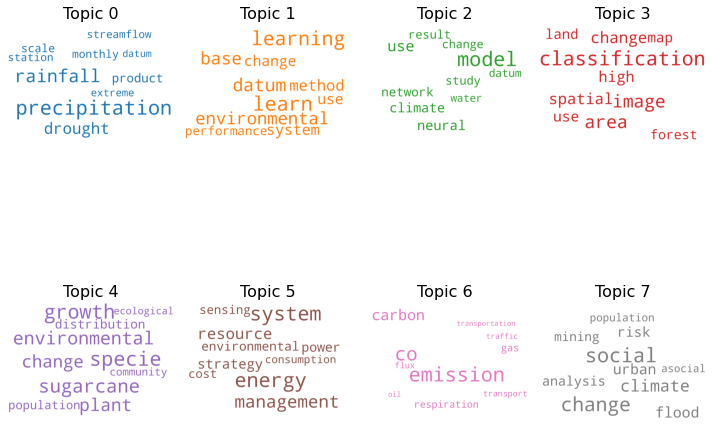

In [202]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()